## 데이터 핸들링 및 전처리 

## 06. 이상치 처리하기

<img src = "https://images.unsplash.com/photo-1536303100418-985cb308bb38?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1770&q=80" width=80% align="center"/>

<div align="right">사진: <a href="https://unsplash.com/ko/%EC%82%AC%EC%A7%84/ku_ttDpqIVc?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>의<a href="https://unsplash.com/@will_myers?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Will Myers</a>
  
  </div>
  
  

## 0. 데이터 불러오기
- ### 데이터 설명
    1. preprocessing_06.csv : 이전 실습에서 데이터 타입을 변경하고 중복데이터를 제거한 데이터 
> - MovieId : (int) 영화 아이디 <br>
> - ImdbId : (int) IMDb 데이터베이스 관리 아이디<br>
> - TmdbId : (int) TMDB 데이터베이스 관리 아이디<br>
> - Title : (object) 영화 제목 <br> 
> - Year : (int) 제작년도 <br> 
> - Genres : (object) 영화의 장르, '|'을 구분자로 한 복수 장르
> - UserId : (int) 유저 아이디 <br>
> - Rating : (float) 영화 평점 <br>
> - Gender : (object) 성별, M/F <br>
> - Age : (int) 나이<br>
> - Occupation : (object) 직업,<br>


In [2]:
# 라이브러리 불러오기
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 데이터 불러오기
df = pd.read_csv("./data/preprocessing_06.csv")

In [4]:
# 데이터 샘플 확인하기
df.head()

,MovieId,ImdbId,TmdbId,Title,Year,Genres,UserId,Rating,Gender,Age,Occupation
0,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,F,2,K-12 student
1,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,M,30,writer
2,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,M,39,academic/educator
3,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,M,29,executive/managerial
4,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,M,52,academic/educator


In [4]:
# 데이터 샘플 확인하기
df.tail()

,MovieId,ImdbId,TmdbId,Title,Year,Genres,UserId,Rating,Gender,Age,Occupation
100833,193581,5476944,432131,Black Butler: Book of the Atlantic,2017,Action|Animation|Comedy|Fantasy,184,4.0,F,33,other
100834,193583,5914996,445030,No Game No Life: Zero,2017,Animation|Comedy|Fantasy,184,3.5,F,33,other
100835,193585,6397426,479308,Flint,2017,Drama,184,3.5,F,33,other
100836,193587,8391976,483455,Bungo Stray Dogs: Dead Apple,2018,Action|Animation,184,3.5,F,33,other
100837,193609,101726,37891,Andrew Dice Clay: Dice Rules,1991,Comedy,331,4.0,M,32,executive/managerial


In [5]:
df_copy = df.copy()

---

### 1. 이상치 탐지하기
#### 1-1. .describe() 메소드를 사용하여 통계적 특성 확인하기
데이터프레임은 .describe() 메소드를 사용하면 통계적 특성을 확인할 수 있습니다.

In [6]:
df.describe()

,MovieId,ImdbId,TmdbId,Year,UserId,Rating,Age
count,100838.000000,1.008380e+05,100838.000000,100838.000000,100838.000000,100838.000000,100838.000000
mean,19433.425951,3.515405e+05,20106.294859,1994.144618,326.184950,3.501631,33.399611
std,35528.198872,6.220657e+05,53270.528876,28.249391,182.639667,1.042351,15.584439
min,1.000000,4.170000e+02,2.000000,0.000000,1.000000,0.500000,1.000000
25%,1199.000000,9.968500e+04,712.000000,1990.000000,177.000000,3.000000,23.000000
50%,2991.000000,1.187635e+05,6961.000000,1997.000000,325.000000,3.500000,32.000000
75%,8121.000000,3.149790e+05,11635.750000,2003.000000,477.000000,4.000000,42.000000
max,193609.000000,8.391976e+06,525662.000000,2018.000000,611.000000,5.000000,110.000000


#### 1-2 시각화를 통해 이상치 탐지하기
Box Plot을 그리면 데이터의 분포를 한 눈에 볼 수 있게 시각화하여 이상치(Outlier)를 탐지할 수 있습니다. 
- matplot 라이브러리를 활용하여 Box Plot 차트를 그립니다. 

In [7]:
# 라이브러리 불러오기 
import matplotlib.pyplot as plt

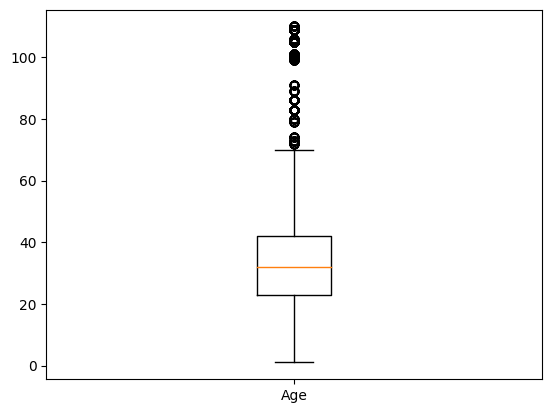

In [8]:
# 차트 영역 설정하기
plt.figure()
plt.boxplot(df['Age'], labels=['Age'])
plt.show()

---

### 2. 이상치 확인하기
IQR의 1.5배 이상 크거나 작은 데이터를 이상치로 판별합니다.

#### 2-1. 데이터의 IQR 계산하기

먼저 데이터의 중앙값(median)을 계산하고, 이를 기준으로 데이터를 하위 25%와 상위 25%로 분할합니다. 이를 통해 데이터의 IQR을 계산합니다.

- 'Age' 컬럼의 IQR을 계산합니다.

In [9]:
df['Age'].describe()

count    100838.000000
mean         33.399611
std          15.584439
min           1.000000
25%          23.000000
50%          32.000000
75%          42.000000
max         110.000000
Name: Age, dtype: float64

In [15]:
# 중앙값 계산
Q2 = df['Age'].median()

# 하위 25%, 상위 25% 범위 계산
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

33.3996112576608
32.0


In [17]:
print(Q1)
print(Q3)
print(IQR)

23.0
42.0
19.0


#### 2-2. 이상치 판별하기
IQR의 1.5배 이상 크거나 작은 데이터를 이상치로 판별합니다.
- 'Age' 값이 IQR 범위 내에 있는지 확인

In [12]:
# 이상치 판별
df['IsOutlier_Age'] = (df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)

In [13]:
df.head(10)

,MovieId,ImdbId,TmdbId,Title,Year,Genres,UserId,Rating,Gender,Age,Occupation,IsOutlier_Age
0,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,F,2,K-12 student,False
1,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,M,30,writer,False
2,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,M,39,academic/educator,False
3,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,M,29,executive/managerial,False
4,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,M,52,academic/educator,False
5,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,18,3.5,F,23,clerical/admin,False
6,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,19,4.0,M,3,K-12 student,False
7,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,21,3.5,M,18,self-employed,False
8,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,27,3.0,M,31,lawyer,False
9,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,31,5.0,M,73,executive/managerial,True


---

---

### 3. 이상치 처리하기
이상치를 삭제하거나 대체값으로 교체하는 등의 처리 방법 중 하나를 선택하여 이상치를 처리합니다.


#### 3-1. 이상치 삭제하기

In [23]:
# 이상치 삭제
df = df[df['IsOutlier_Age'] == False]

In [24]:
age_compare = pd.DataFrame(columns=['Origin', 'Delete', 'Inplace']) 
age_compare['Origin'] = df_copy['Age']
age_compare['Delete'] = df['Age']

In [25]:
age_compare.describe()

,Origin,Delete
count,100838.000000,98752.000000
mean,33.399611,32.057386
std,15.584439,12.571332
min,1.000000,1.000000
25%,23.000000,23.000000
50%,32.000000,31.000000
75%,42.000000,41.000000
max,110.000000,70.000000


In [26]:
df = df_copy.copy()

#### 3-2. 이상치 대체하기
이상치를 다른 값으로 대체하는 방법입니다. 예를 들어, 평균, 중앙값, 최빈값 등의 대체 방법을 사용할 수 있습니다. <br> 이 경우에는 데이터의 손실을 최소화할 수 있지만, 대체된 값이 원래 데이터의 특성을 왜곡할 수 있습니다.

In [28]:
df['IsOutlier_Age'] = (df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)
df.loc[df['IsOutlier_Age'], 'Age'] = df['Age'].median()

,MovieId,ImdbId,TmdbId,Title,Year,Genres,UserId,Rating,Gender,Age,Occupation,IsOutlier_Age
0,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,F,2,K-12 student,False
1,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,M,30,writer,False
2,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,M,39,academic/educator,False
3,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,M,29,executive/managerial,False
4,1,114709,862,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,M,52,academic/educator,False


In [29]:
age_compare['Inplace'] = df['Age']

In [30]:
age_compare.describe()

,Origin,Delete,Inplace
count,100838.000000,98752.000000,100838.000000
mean,33.399611,32.057386,32.056199
std,15.584439,12.571332,12.440624
min,1.000000,1.000000,1.000000
25%,23.000000,23.000000,23.000000
50%,32.000000,31.000000,32.000000
75%,42.000000,41.000000,41.000000
max,110.000000,70.000000,70.000000


In [21]:
df = df_copy.copy()

---

## 실습문제

#### Q1. 데이터프레임 'df' 의 'Year' 컬럼의 통계적 특성을 확인해 보세요.

In [ ]:
# 여기에 작성하세요.





#### Q2. 데이터프레임 'df'의 'Year' 컬럼에 대한 Box Plot을 그려서 이상치를 탐지해 보세요.

In [ ]:
# 여기에 작성하세요.





#### Q3. 'Year' 컬럼의 IQR을 계산해 보세요.

In [ ]:
# 여기에 작성하세요.





#### Q4. 'Year' 컬럼에서 IQR * 1.5 범위를 벗어나는 데이터를 이상치(Outlier)로 판단하는 컬럼 'IsOutlier_Year' 을 만들어 주세요.

In [ ]:
# 여기에 작성하세요.





#### Q5. 제작년도의 이상치는 단순히 통계적으로만 판단하면 안됩니다. 하지만 이상치로 판단되는 데이터 중에서 제작년도가 존재할 수 없는 데이터의 경우( 0이거나 9999와 같은 값)는 이상치라고 할 수 있습니다. 이러한 데이터는 찾아서 삭제해 주세요. 

In [ ]:
# 여기에 작성하세요.





#### Q5. 이상치 처리를 위해 사용했던 컬럼 'IsOutlier_Year' 은 삭제해 주세요. 

In [ ]:
# 여기에 작성하세요.





---